**Contents**

01 Importing Libraries and Datasets

02 Customer Profiles

02.1 Family Category

02.2 Age Category

02.3 Income Category

03 Aggregating usage and expenditure

03.1 Usage

03.2 Expenditure

04 Crosstabs

04.1 Region x Income category

04.2 Region x Age category

04.3 Region x Family category

05 Export

# 01. Importing Libraries and Datasets

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Set Path
path = r'C:\Users\Forrest\Desktop\Work\CareerFoundry\Python\2022-10 Instacart Basket Analysis'

In [4]:
# Import active_users
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_users.pkl'))

# 02. Customer profiles

## 02.1 Family category

In [5]:
# Creating three categories: 
# Users with more than 1 dependent and married = married with children
# Users with more than 1 dependent and single, divorced/widowed, or living with parents or siblings = single with children
# users with no dependents = no children

df.loc[(df['dependents']>0)&(df['mar_status']=='married'),'family_category']='married with children'
df.loc[(df['dependents']>0)&(df['mar_status']!='married'),'family_category']='single with children'
df.loc[df['dependents']==0,'family_category']='no children'

In [6]:
df['family_category'].value_counts()

married with children    21763585
no children               7747183
single with children      1482721
Name: family_category, dtype: int64

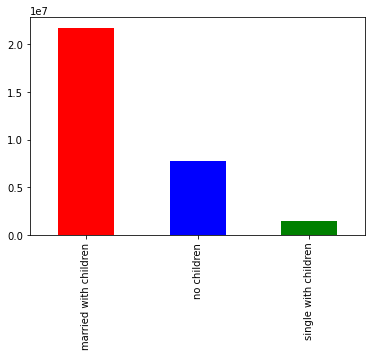

In [10]:
# Creating visualization of family_category column

family_bar=df['family_category'].value_counts().plot.bar(color=['red','blue','green'])

In [11]:
# Saving family visualization

family_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_bar.png'))

## 02.2 Age category

In [7]:
# Creating age categories

df.loc[(df['age']>=18)&(df['age']<=29),'age_category']='18-29'
df.loc[(df['age']>=30)&(df['age']<=39),'age_category']='30-39'
df.loc[(df['age']>=40)&(df['age']<=49),'age_category']='40-49'
df.loc[(df['age']>=50)&(df['age']<=59),'age_category']='50-59'
df.loc[df['age']>60,'age_category']='60+'

In [8]:
df['age_category'].value_counts()

60+      10121834
18-29     5823190
40-49     4887799
30-39     4851781
50-59     4846544
Name: age_category, dtype: int64

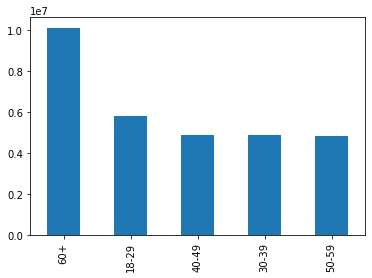

In [13]:
# Creating visualization of age column

age_bar=df['age_category'].value_counts().plot.bar()

In [14]:
# Saving age visualization

age_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_bar.png'))

## 02.3 Income category

In [9]:
# Creating income categories

df.loc[(df['income']<20000),'income_category']='under 20k'
df.loc[(df['income']>=20000)&(df['income']<50000),'income_category']='20k-50k'
df.loc[(df['income']>=50000)&(df['income']<80000),'income_category']='50k-80k'
df.loc[(df['income']>=80000)&(df['income']<=120000),'income_category']='80k-120k'
df.loc[df['income']>120000,'income_category']='120k+'

In [10]:
df['income_category'].value_counts()

80k-120k    10803380
120k+        9187614
50k-80k      7636276
20k-50k      3366219
Name: income_category, dtype: int64

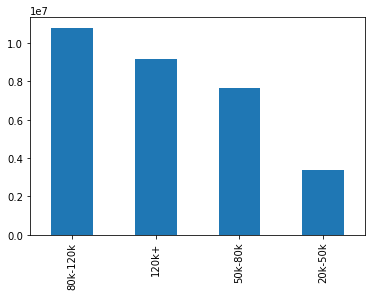

In [21]:
# Visualization based on income category

income_bar=df['income_category'].value_counts().plot.bar()

In [22]:
# Saving income visualization

income_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_bar.png'))

# 03. Aggregating usage and expenditure

## 03.1 Usage

In [11]:
# Creating 'min_usage' column to show minimum days since prior order grouped by user

df['min_usage']=df.groupby(['user_id'])['days_since_prior_order'].transform(np.min)

In [17]:
df['min_usage'].value_counts()

0.0     9431658
1.0     6550892
2.0     3942905
3.0     2671032
4.0     1936605
5.0     1733339
6.0     1610905
7.0     1059783
8.0      460215
9.0      282020
10.0     203225
13.0     168857
11.0     165499
14.0     155199
12.0     145286
15.0      77684
30.0      54665
16.0      47610
17.0      39760
21.0      39017
20.0      37980
18.0      33366
19.0      32297
22.0      23043
23.0      17659
28.0      16048
27.0      13305
26.0      12019
24.0      11749
25.0      11368
29.0       8499
Name: min_usage, dtype: int64

In [12]:
# Creating 'max_usage' column to show maxmimum days since prior order grouped by user

df['max_usage']=df.groupby(['user_id'])['days_since_prior_order'].transform(np.max)

In [18]:
df['max_usage'].value_counts()

30.0    17486645
21.0      960188
15.0      871343
14.0      868501
22.0      814562
28.0      798577
20.0      725884
16.0      635194
23.0      625745
17.0      623638
19.0      600843
18.0      588034
29.0      587139
27.0      579241
13.0      559948
25.0      541466
24.0      536273
26.0      519072
12.0      451025
11.0      380974
10.0      353463
9.0       286367
8.0       256313
7.0       161986
6.0        67649
5.0        65327
4.0        35870
3.0         8071
2.0         3759
1.0          309
0.0           83
Name: max_usage, dtype: int64

In [13]:
# Creating 'avg_usage' column to show average days since prior order grouped by user

df['avg_usage']=df.groupby(['user_id'])['days_since_prior_order'].transform(np.mean)

In [19]:
df['avg_usage'].value_counts()

30.000000    54665
7.000000     14367
14.000000    11697
9.000000     11220
16.000000    11048
             ...  
2.111111        11
1.555556        10
4.222222        10
1.125000        10
0.571429         8
Name: avg_usage, Length: 98107, dtype: int64

## 03.2 Expenditure

In [14]:
# Creating 'min_expenditure' column to show minimum price paid grouped by user

df['min_expenditure']=df.groupby(['user_id'])['prices'].transform(np.min)

In [20]:
df['min_expenditure'].value_counts()

1.0     10994894
1.1     10366798
1.2      4562676
1.3      2715463
1.4      1017173
          ...   
12.0           6
12.2           5
11.4           5
12.4           5
11.9           5
Name: min_expenditure, Length: 130, dtype: int64

In [15]:
# Creating 'max_expenditure' column to show maximum price paid grouped by user

df['max_expenditure']=df.groupby(['user_id'])['prices'].transform(np.max)

In [22]:
df['max_expenditure'].value_counts()

14.9    2740907
15.0    2591814
25.0    1662115
14.8    1615187
24.2    1609731
         ...   
1.5           8
3.3           7
1.7           7
3.5           7
1.1           7
Name: max_expenditure, Length: 235, dtype: int64

In [16]:
# Creating 'avg_expenditure' column to show mean price paid grouped by user

df['avg_expenditure']=df.groupby(['user_id'])['prices'].transform(np.mean)

In [21]:
df['avg_expenditure'].value_counts()

8.00     8874
7.50     7485
7.75     6425
7.40     6371
8.10     6267
         ... 
3.86        5
2.34        5
10.68       5
13.90       5
5.16        5
Name: avg_expenditure, Length: 119861, dtype: int64

# 04. Crosstabs

## 04.1 Region x Income category

In [33]:
crosstab_region=pd.crosstab(df['region'],df['income_category'],normalize='index',dropna=False)

In [34]:
crosstab_region

# Shows income level as decimal percentage within region

income_category,120k+,20k-50k,50k-80k,80k-120k
region,,,,
Midwest,0.301418,0.107945,0.242556,0.348081
Northeast,0.298072,0.107465,0.241535,0.352928
South,0.293200,0.110836,0.248223,0.347741
West,0.294958,0.107115,0.250838,0.347089


In [45]:
df.groupby('income_category')['avg_expenditure'].mean()

income_category
120k+       7.952075
20k-50k     6.707214
50k-80k     7.837894
80k-120k    7.957254
Name: avg_expenditure, dtype: float64

In [46]:
df.groupby('income_category')['avg_usage'].mean()

income_category
120k+       10.944742
20k-50k     11.384614
50k-80k     10.933175
80k-120k    10.968072
Name: avg_usage, dtype: float64

**Midwest has the highest percentage of the top income group, while the South has the lowest**

## 04.2 Region x Age category

In [36]:
crosstab_age=pd.crosstab(df['region'],df['age_category'],normalize='index',dropna=False)

In [37]:
crosstab_age

age_category,18-29,30-39,40-49,50-59,60+
region,,,,,
Midwest,0.189281,0.157393,0.164024,0.160304,0.328999
Northeast,0.190027,0.157266,0.159483,0.157578,0.335646
South,0.193163,0.162293,0.157722,0.155704,0.331119
West,0.189378,0.157047,0.159988,0.162062,0.331524


In [38]:
df.groupby('age_category')['avg_expenditure'].mean()

age_category
18-29    7.782131
30-39    7.787918
40-49    7.798170
50-59    7.784906
60+      7.796127
Name: avg_expenditure, dtype: float64

In [43]:
df.groupby('age_category')['avg_usage'].mean()

age_category
18-29    10.998817
30-39    10.992137
40-49    10.985938
50-59    11.032097
60+      10.980563
Name: avg_usage, dtype: float64

## 04.3 Region x Family category

In [39]:
crosstab_family=pd.crosstab(df['region'],df['family_category'],normalize='index',dropna=False)

In [40]:
crosstab_family

family_category,married with children,no children,single with children
region,,,
Midwest,0.700570,0.251037,0.048393
Northeast,0.705195,0.247861,0.046944
South,0.700564,0.250414,0.049023
West,0.703752,0.249837,0.046412


In [44]:
df.groupby('family_category')['avg_expenditure'].mean()

family_category
married with children    7.790229
no children              7.789525
single with children     7.800463
Name: avg_expenditure, dtype: float64

In [45]:
df.groupby('family_category')['avg_usage'].mean()

family_category
married with children    11.008062
no children              10.980874
single with children     10.935579
Name: avg_usage, dtype: float64

# 05. Export

In [46]:
df.to_pickle(os.path.join(path,'02 Data','Prepared Data','master2.pkl'))